In [1]:
import re
import nltk
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 
%matplotlib inline

In [3]:
import os

In [4]:
#reading test and train data
train  = pd.read_csv('C:/Users/dell/Downloads/train_E6oV3lV.csv') 
test = pd.read_csv('C:/Users/dell/Downloads/test_tweets_anuFYb8.csv')

In [5]:
#reading test and train data
#use forward slash instead of backward to read data from desktop
train  = pd.read_csv('C:/Users/dell/Downloads/train_E6oV3lV.csv') 
test = pd.read_csv('C:/Users/dell/Downloads/test_tweets_anuFYb8.csv')

In [6]:
train[train['label']==0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


In [7]:
train[train['label']==1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦


In [8]:
train.shape

(31962, 3)

In [9]:
test.shape

(17197, 2)

In [10]:
train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

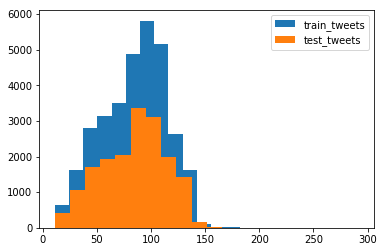

In [11]:
length_train = train['tweet'].str.len() 
length_test = test['tweet'].str.len() 
plt.hist(length_train, bins=20, label="train_tweets") 
plt.hist(length_test, bins=20, label="test_tweets") 
plt.legend() 
plt.show()

In [12]:
#combine train and test data 
combi = train.append(test,ignore_index=True,sort=False)

In [13]:
combi.shape

(49159, 3)

In [14]:
#Given below is a user-defined function to remove unwanted text patterns from the tweets.
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt    

In [15]:
# Removing Twitter Handles (@user)
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*") 
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [16]:
# Removing Punctuations, Numbers, and Special Characters
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ") 
combi.head(10)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,huge fan fare and big talking before they leave chaos and pay disputes when they get there #allshowandnogo
6,7,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,the next school year is the year for exams can t think about that #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,we won love the land #allin #cavs #champions #cleveland #clevelandcavaliers
9,10,0.0,@user @user welcome here ! i'm it's so #gr8 !,welcome here i m it s so #gr


In [17]:
#removing sort words
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In [18]:
#tokenization
tokenized_tweet=combi['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0                [when, father, dysfunctional, selfish, drags, kids, into, dysfunction, #run]
1    [thanks, #lyft, credit, cause, they, offer, wheelchair, vans, #disapointed, #getthanked]
2                                                                     [bihday, your, majesty]
3                                                            [#model, love, take, with, time]
4                                                          [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

In [19]:
#import poterstemmer from nltk library
from __future__ import print_function
from nltk.stem import *
from nltk.stem.porter import *
stemmer = PorterStemmer()

In [20]:
#stemming
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

In [21]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])    
combi['tidy_tweet'] = tokenized_tweet

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer 

In [23]:
bow_vectorizer = CountVectorizer(max_df=0.90,ngram_range=(1,2), min_df=2, max_features=1000, stop_words='english')

In [24]:
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])

In [25]:
bow.shape

(49159, 1000)

In [26]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90,ngram_range=(1,2), min_df=2, max_features=1000, stop_words='english')

In [27]:
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])

In [28]:
tfidf.shape

(49159, 1000)

In [29]:
import gensim

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [30]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())

In [31]:
#training a Word2Vec model on our corpus
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34) 
model_w2v.train(tokenized_tweet, total_examples= len(combi['tidy_tweet']), epochs=20)

(6510028, 7536020)

In [32]:
#testing our model
model_w2v.wv.most_similar(positive="dinner")

[('#avocado', 0.5680983662605286),
 ('#biall', 0.5515506267547607),
 ('cookout', 0.5508288145065308),
 ('spaghetti', 0.5503631830215454),
 ('melani', 0.5367459654808044),
 ('#cellar', 0.5350143909454346),
 ('fav', 0.5342785120010376),
 ('spinach', 0.5333420634269714),
 ('#bihdaydinn', 0.5331523418426514),
 ('noodl', 0.5329619646072388)]

In [33]:
#check the vector representation of any word from our corpus
model_w2v['food']

array([-2.20504656e-01,  2.35428244e-01, -6.65115535e-01,  5.31672776e-01,
       -8.53725433e-01,  3.18220228e-01, -2.01517195e-01,  4.08881694e-01,
       -4.56183612e-01, -2.22480863e-01,  4.46627259e-01,  4.86405015e-01,
        6.66425601e-02, -8.48116636e-01, -4.51006651e-01,  5.08116722e-01,
        7.70817325e-02, -3.60659212e-02, -1.35965347e-01,  2.65888143e-02,
       -5.52225590e-01,  4.48081642e-01, -5.05010784e-01, -3.32603008e-01,
       -3.97511482e-01, -2.44809717e-01,  1.23941377e-01,  5.02361655e-01,
        3.51046830e-01,  9.04936790e-02, -5.27797267e-03,  1.97484761e-01,
       -1.13055430e-01,  9.60133225e-02, -8.89795795e-02,  1.00747570e-01,
        5.37672155e-02,  2.49574050e-01,  1.49701059e-01,  1.69084325e-01,
        2.59170771e-01,  3.93858790e-01,  3.65755260e-01,  2.10033953e-02,
        1.08677042e+00, -7.02806056e-01, -1.26961514e-01, -7.59154499e-01,
        1.37438595e-01,  1.44581990e-02,  8.53074074e-01, -9.43284556e-02,
        2.64084369e-01,  

In [34]:
len(model_w2v['food'])

200

In [35]:
#We will use the below function to create a vector for each tweet by taking the average of the vectors of the words present in the tweet.
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary                                     
            continue
    if count != 0:
        vec /= count
    return vec

In [36]:
#Preparing word2vec feature set…
wordvec_arrays = np.zeros((len(tokenized_tweet), 200)) 
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

(49159, 200)

In [37]:
#Now we will train diffrent models for datasets
#first of all we are going to train a logistic regression model
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score

In [38]:
#We will first try to fit the logistic regression model on the Bag-of_Words (BoW) features.
# Extracting train and test BoW features 
train_bow = bow[:31962,:] 
test_bow = bow[31962:,:] 

In [39]:
# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state=42, test_size=0.3)

In [40]:
lreg = LogisticRegression() 

In [41]:
# training the model 
lreg.fit(xtrain_bow, ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [42]:
prediction = lreg.predict_proba(xvalid_bow)
# predicting on the validation set 
prediction_int = prediction[:,1] >= 0.3 
# if prediction is greater than or equal to 0.3 than 1 else 0 prediction_int = prediction_int.astype(np.int) 

In [43]:
f1_score(yvalid, prediction_int) 
# calculating f1 score for the validation set


0.525963149078727

In [44]:
test_pred = lreg.predict_proba(test_bow) 
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int) 
test['label'] = test_pred_int 
submission = test[['id','label']] 
submission.to_csv('sub_lreg_bow.csv', index=False) 
# writing data to a CSV file

In [45]:
#TF-IDF Features

#We’ll follow the same steps as above, but now for the TF-IDF feature set.

In [46]:
train_tfidf = tfidf[:31962,:] 
test_tfidf = tfidf[31962:,:] 
xtrain_tfidf = train_tfidf[ytrain.index] 
xvalid_tfidf = train_tfidf[yvalid.index]

In [47]:
lreg.fit(xtrain_tfidf, ytrain) 
prediction = lreg.predict_proba(xvalid_tfidf) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int) 
# calculating f1 score for the validation set

0.5314437555358724

In [48]:
#Word2Vec Features
train_w2v = wordvec_df.iloc[:31962,:]
test_w2v = wordvec_df.iloc[31962:,:] 
xtrain_w2v = train_w2v.iloc[ytrain.index,:] 
xvalid_w2v = train_w2v.iloc[yvalid.index,:]

In [49]:
lreg.fit(xtrain_w2v, ytrain) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [50]:
prediction = lreg.predict_proba(xvalid_w2v) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

0.6190125276344878

In [51]:
#Now we will implement SVM on our data using the scikit-learn library.
from sklearn import svm

In [52]:
#Bag-of-Words Features
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_bow, ytrain) 
prediction = svc.predict_proba(xvalid_bow) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

0.49906890130353815

In [53]:
#Again let’s make predictions for the test dataset and create another submission file.
test_pred = svc.predict_proba(test_bow) 
test_pred_int = test_pred[:,1] >= 0.3 
test_pred_int = test_pred_int.astype(np.int) 
test['label'] = test_pred_int 
submission = test[['id','label']] 
submission.to_csv('sub_svm_bow.csv', index=False)

In [54]:
#Here validation score is slightly lesser than the Logistic Regression scores for bag-of-words features.

In [55]:
#TF-IDF Features
svc = svm.SVC(kernel='linear', 
C=1, probability=True).fit(xtrain_tfidf, ytrain) 
prediction = svc.predict_proba(xvalid_tfidf) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

0.5104831358249772

In [56]:
#Word2Vec Features
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_w2v, ytrain) 
prediction = svc.predict_proba(xvalid_w2v) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

0.6231546231546231

In [57]:
#RANDOM FOREST

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
#Bag-of-Words Features
#First we will train our RandomForest model on the Bag-of-Words features and check its performance 
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_bow, ytrain) 
prediction = rf.predict(xvalid_bow) 
# validation score 
f1_score(yvalid, prediction)

0.539607843137255

In [60]:
#Let’s make predictions for the test dataset and create another submission file.
test_pred = rf.predict(test_bow) 
test['label'] = test_pred 
submission = test[['id','label']] 
submission.to_csv('sub_rf_bow.csv', index=False)

In [61]:
#TF-IDF Features

rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_tfidf, ytrain) 
prediction = rf.predict(xvalid_tfidf) 
f1_score(yvalid, prediction)

0.5521023765996343

In [62]:
#Word2Vec Features

rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_w2v, ytrain) 
prediction = rf.predict(xvalid_w2v) 
f1_score(yvalid, prediction)

0.5191489361702128

In [63]:
#xgboost
import sys
!{sys.executable} -m pip install xgboost


In [64]:
from xgboost import XGBClassifier

In [65]:
#Bag-of-Words Features

xgb_model = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_bow, ytrain) 
prediction = xgb_model.predict(xvalid_bow) 
f1_score(yvalid, prediction)

0.5033751205400192

In [66]:
#TF-IDF Features

xgb = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_tfidf, ytrain) 
prediction = xgb.predict(xvalid_tfidf) 
f1_score(yvalid, prediction)

0.5213270142180094

In [67]:
#Word2Vec Features

xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3).fit(xtrain_w2v, ytrain) 
prediction = xgb.predict(xvalid_w2v) 
f1_score(yvalid, prediction)

0.642791551882461

In [68]:
#XGBoost model on word2vec features has outperformed all the previuos models 

In [87]:
#FineTuning XGBoost + Word2Vec

In [70]:
import xgboost as xgb

In [71]:
#Here we will use DMatrices. A DMatrix can contain both the features and the target.
dtrain = xgb.DMatrix(xtrain_w2v, label=ytrain) 
dvalid = xgb.DMatrix(xvalid_w2v, label=yvalid) 
dtest = xgb.DMatrix(test_w2v)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [72]:
# Parameters that we are going to tune 
params = {
    'objective':'binary:logistic',
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1
 }

In [73]:
#We will prepare a custom evaluation metric to calculate F1 score.

def custom_eval(preds, dtrain):
    labels = dtrain.get_label().astype(np.int)
    preds = (preds >= 0.3).astype(np.int)
    return [('f1_score', f1_score(labels, preds))]

In [74]:
#XGBoost with Word2Vec model has given us the best performance so far. Let’s try to tune it further to extract as much from it as we can

In [75]:
import xgboost as xgb

In [76]:
#Here we will use DMatrices. A DMatrix can contain both the features and the target.
dtrain = xgb.DMatrix(xtrain_w2v, label=ytrain) 
dvalid = xgb.DMatrix(xvalid_w2v, label=yvalid) 
dtest = xgb.DMatrix(test_w2v)

In [77]:
# Parameters that we are going to tune 
params = {
    'objective':'binary:logistic',
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1
 }

In [78]:
#We will prepare a custom evaluation metric to calculate F1 score.

def custom_eval(preds, dtrain):
    labels = dtrain.get_label().astype(np.int)
    preds = (preds >= 0.3).astype(np.int)
    return [('f1_score', f1_score(labels, preds))]

In [79]:
#General Approach for Parameter Tuning

#We will follow the steps below to tune the parameters.

#Choose a relatively high learning rate. Usually a learning rate of 0.3 is used at this stage.

#Tune tree-specific parameters such as max_depth, min_child_weight, subsample, colsample_bytree keeping the learning rate fixed.

#Tune the learning rate.

#Finally tune gamma to avoid overfitting.

In [80]:
#Tuning max_depth and min_child_weight

In [81]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(6,10)
     for min_child_weight in range(5,8)
 ]

In [82]:
max_f1 = 0. # initializing with 0 
best_params = None 
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
# Cross-validation
    cv_results = xgb.cv(        params,
        dtrain,        feval= custom_eval,
        num_boost_round=200,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=10
    )     
# Finding best F1 Score
mean_f1 = cv_results['test-f1_score-mean'].max()
    
boost_rounds = cv_results['test-f1_score-mean'].argmax()    
print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))    
if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = (max_depth,min_child_weight) 

print("Best params: {}, {}, F1 Score: {}".format(best_params[0], best_params[1], max_f1))

CV with max_depth=6, min_child_weight=5
CV with max_depth=6, min_child_weight=6
CV with max_depth=6, min_child_weight=7
CV with max_depth=7, min_child_weight=5
CV with max_depth=7, min_child_weight=6
CV with max_depth=7, min_child_weight=7
CV with max_depth=8, min_child_weight=5
CV with max_depth=8, min_child_weight=6
CV with max_depth=8, min_child_weight=7
CV with max_depth=9, min_child_weight=5
CV with max_depth=9, min_child_weight=6
CV with max_depth=9, min_child_weight=7
	F1 Score 0.6765106 for 54 rounds
Best params: 9, 7, F1 Score: 0.6765106


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


In [83]:
#Updating max_depth and min_child_weight parameters.

params['max_depth'] = 8 
params['min_child_weight'] = 6

In [84]:
#Tuning subsample and colsample

gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(5,10)]
    for colsample in [i/10. for i in range(5,10)] ]

In [85]:
max_f1 = 0. 
best_params = None 
for subsample, colsample in gridsearch_params:
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
     # Update our parameters
    params['colsample'] = colsample
    params['subsample'] = subsample
    cv_results = xgb.cv(
        params,
        dtrain,
        feval= custom_eval,
        num_boost_round=200,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=10
    )
     # Finding best F1 Score
    mean_f1 = cv_results['test-f1_score-mean'].max()
    boost_rounds = cv_results['test-f1_score-mean'].argmax()
    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = (subsample, colsample) 

print("Best params: {}, {}, F1 Score: {}".format(best_params[0], best_params[1], max_f1))

CV with subsample=0.5, colsample=0.5


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


	F1 Score 0.6612004 for 46 rounds
CV with subsample=0.5, colsample=0.6
	F1 Score 0.6612004 for 46 rounds
CV with subsample=0.5, colsample=0.7
	F1 Score 0.6612004 for 46 rounds
CV with subsample=0.5, colsample=0.8
	F1 Score 0.6612004 for 46 rounds
CV with subsample=0.5, colsample=0.9
	F1 Score 0.6612004 for 46 rounds
CV with subsample=0.6, colsample=0.5
	F1 Score 0.6741775999999999 for 58 rounds
CV with subsample=0.6, colsample=0.6
	F1 Score 0.6741775999999999 for 58 rounds
CV with subsample=0.6, colsample=0.7
	F1 Score 0.6741775999999999 for 58 rounds
CV with subsample=0.6, colsample=0.8
	F1 Score 0.6741775999999999 for 58 rounds
CV with subsample=0.6, colsample=0.9
	F1 Score 0.6741775999999999 for 58 rounds
CV with subsample=0.7, colsample=0.5
	F1 Score 0.6701276 for 58 rounds
CV with subsample=0.7, colsample=0.6
	F1 Score 0.6701276 for 58 rounds
CV with subsample=0.7, colsample=0.7
	F1 Score 0.6701276 for 58 rounds
CV with subsample=0.7, colsample=0.8
	F1 Score 0.6701276 for 58 round

In [91]:
#Updating subsample and colsample_bytree

params['subsample'] = .9 
params['colsample_bytree'] = .5


In [92]:
#Now let’s tune the learning rate.

max_f1 = 0. 
best_params = None 
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
     # Update ETA
    params['eta'] = eta

     # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        feval= custom_eval,
        num_boost_round=1000,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=20
    )

     # Finding best F1 Score
    mean_f1 = cv_results['test-f1_score-mean'].max()
    boost_rounds = cv_results['test-f1_score-mean'].argmax()
    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = eta 
print("Best params: {}, F1 Score: {}".format(best_params, max_f1))

CV with eta=0.3


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


	F1 Score 0.680669 for 58 rounds
CV with eta=0.2
	F1 Score 0.6907941999999999 for 132 rounds
CV with eta=0.1
	F1 Score 0.688855 for 107 rounds
CV with eta=0.05
	F1 Score 0.6927606 for 218 rounds
CV with eta=0.01
	F1 Score 0.1302024 for 0 rounds
CV with eta=0.005
	F1 Score 0.1302024 for 0 rounds
Best params: 0.05, F1 Score: 0.6927606


In [96]:
params['eta'] = .1

In [97]:
#Let’s have a look at the final list of tuned parameters.

params
{'colsample': 0.9,
 'colsample_bytree': 0.5, 'eta': 0.1,
 'max_depth': 8, 'min_child_weight': 6,
 'objective': 'binary:logistic',
 'subsample': 0.9}

{'colsample': 0.9,
 'colsample_bytree': 0.5,
 'eta': 0.1,
 'max_depth': 8,
 'min_child_weight': 6,
 'objective': 'binary:logistic',
 'subsample': 0.9}

In [98]:
#Finally we can now use these tuned parameters in our xgboost model. We have used early stopping of 10 which means if the model’s performance doesn’t improve under 10 rounds, then the model training will be stopped.

In [99]:
xgb_model = xgb.train(
    params,
    dtrain,
    feval= custom_eval,
    num_boost_round= 1000,
    maximize=True,
    evals=[(dvalid, "Validation")],
    early_stopping_rounds=10
 )

[0]	Validation-error:0.06351	Validation-f1_score:0.133165
Multiple eval metrics have been passed: 'Validation-f1_score' will be used for early stopping.

Will train until Validation-f1_score hasn't improved in 10 rounds.
[1]	Validation-error:0.05475	Validation-f1_score:0.133165
[2]	Validation-error:0.054125	Validation-f1_score:0.133165
[3]	Validation-error:0.054229	Validation-f1_score:0.133165
[4]	Validation-error:0.053707	Validation-f1_score:0.133165
[5]	Validation-error:0.053603	Validation-f1_score:0.383376
[6]	Validation-error:0.054333	Validation-f1_score:0.482263
[7]	Validation-error:0.053395	Validation-f1_score:0.545553
[8]	Validation-error:0.053395	Validation-f1_score:0.572304
[9]	Validation-error:0.053082	Validation-f1_score:0.584595
[10]	Validation-error:0.05256	Validation-f1_score:0.599723
[11]	Validation-error:0.051935	Validation-f1_score:0.591851
[12]	Validation-error:0.052247	Validation-f1_score:0.600733
[13]	Validation-error:0.051726	Validation-f1_score:0.604088
[14]	Valid